**Author:** Yidong Wu  
**Date:** 2023-12-6  
**Affiliation:** Department of Statistics, University of California, Berkeley  
**Address:** Berkeley, CA 94720  
**Email:** areswu@berkeley.edu, areswu16@gmail.com  

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.compose import ColumnTransformer
import tensorflow.keras.utils as ku
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Preprocessing Data

In [2]:
songs_data = pd.read_csv('spotify_songs.csv')

def extract_year(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce').year
    except:
        return pd.to_numeric(date_str, errors='coerce')

songs_data['track_album_release_date'] = songs_data['track_album_release_date'].apply(extract_year)

songs_data.drop(columns=['track_id','track_name','track_artist','track_album_id','track_album_name',
                         'playlist_id','playlist_name','playlist_id','playlist_subgenre'],inplace=True)

songs_data.columns = ['popularity','year','genre','danceability','energy','key','loudness','mode',
                      'speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration']

songs_data.dropna(inplace=True)

genres = songs_data['genre'].unique()
map_genres = {genre: i for i, genre in enumerate(genres)}
map_genres

{'pop': 0, 'rap': 1, 'rock': 2, 'latin': 3, 'r&b': 4, 'edm': 5}

In [3]:
songs_data = songs_data.replace({"genre":map_genres})
songs_data.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,66,2019.0,0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2019.0,0,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2019.0,0,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2019.0,0,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2019.0,0,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30947 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        30947 non-null  int64  
 1   year              30947 non-null  float64
 2   genre             30947 non-null  int64  
 3   danceability      30947 non-null  float64
 4   energy            30947 non-null  float64
 5   key               30947 non-null  int64  
 6   loudness          30947 non-null  float64
 7   mode              30947 non-null  int64  
 8   speechiness       30947 non-null  float64
 9   acousticness      30947 non-null  float64
 10  instrumentalness  30947 non-null  float64
 11  liveness          30947 non-null  float64
 12  valence           30947 non-null  float64
 13  tempo             30947 non-null  float64
 14  duration          30947 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 3.8 MB


In [111]:
train, test = train_test_split(songs_data, test_size=0.2, random_state=106)

X_train = train.drop(['genre'],axis=1)
y_train = train[['genre']]

X_test = test.drop(['genre'],axis=1)
y_test = test[['genre']]

In [112]:
categorical_columns = ['year', 'key', 'mode']

X_train_categorical = X_train[categorical_columns]
X_train_numerical = X_train.drop(categorical_columns, axis=1)

X_test_categorical = X_test[categorical_columns]
X_test_numerical = X_test.drop(categorical_columns, axis=1)

scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=X_train_numerical.columns, index=X_train_numerical.index)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=X_test_numerical.columns, index=X_test_numerical.index)

X_train_scaled = pd.concat([X_train_numerical_scaled_df, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_numerical_scaled_df, X_test_categorical], axis=1)

# Traditional ML Methods

In [96]:
# Naive Bayes
start_time = time.time()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train.squeeze())
y_pred_nb = nb_classifier.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test.squeeze(), y_pred_nb)
end_time = time.time()
print("Running time for Naive Bayes:", end_time - start_time, "seconds")
print("Accuracy of Naive Bayes:", accuracy_nb)


# Decision Tree
start_time = time.time()
dt_classifier = DecisionTreeClassifier(random_state=106)
dt_classifier.fit(X_train_scaled, y_train.squeeze())
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test.squeeze(), y_pred_dt)
end_time = time.time()
print("Running time for Decision Tree:", end_time - start_time, "seconds")
print("Accuracy of Decision Tree:", accuracy_dt)

# Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=106)
rf_classifier.fit(X_train_scaled, y_train.squeeze())
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test.squeeze(), y_pred_rf)
end_time = time.time()
print("Running time for Random Forest:", end_time - start_time, "seconds")
print("Accuracy of Random Forest:", accuracy_rf)

# Gradient Boosting Machine
start_time = time.time()
gbm_classifier = GradientBoostingClassifier(random_state=106)
gbm_classifier.fit(X_train_scaled, y_train.squeeze())
y_pred_gbm = gbm_classifier.predict(X_test_scaled)
accuracy_gbm = accuracy_score(y_test.squeeze(), y_pred_gbm)
end_time = time.time()
print("Running time for Gradient Boosting Machine:", end_time - start_time, "seconds")
print("Accuracy of Gradient Boosting Machine:", accuracy_gbm)

Running time for Naive Bayes: 0.007670164108276367 seconds
Accuracy of Naive Bayes: 0.4801292407108239
Running time for Decision Tree: 0.2803361415863037 seconds
Accuracy of Decision Tree: 0.46122778675282716
Running time for Random Forest: 4.590944051742554 seconds
Accuracy of Random Forest: 0.5835218093699516
Running time for Gradient Boosting Machine: 31.48538088798523 seconds
Accuracy of Gradient Boosting Machine: 0.58578352180937


In [104]:
X_full = np.concatenate((X_train_scaled, X_test_scaled))
y_full = np.concatenate((y_train, y_test))
cv_accuracy_nb = cross_val_score(nb_classifier, X_full, y_full.squeeze(), cv=5).mean()
cv_accuracy_dt = cross_val_score(dt_classifier, X_full, y_full.squeeze(), cv=5).mean()
cv_accuracy_rf = cross_val_score(rf_classifier, X_full, y_full.squeeze(), cv=5).mean()
cv_accuracy_gbm = cross_val_score(gbm_classifier, X_full, y_full.squeeze(), cv=5).mean()
print(f"Cross-Validation Accuracy of Naive Bayes: {cv_accuracy_nb}")
print(f"Cross-Validation Accuracy of Decision Tree: {cv_accuracy_dt}")
print(f"Cross-Validation Accuracy of Random Forest: {cv_accuracy_rf}")
print(f"Cross-Validation Accuracy of Gradient Boosting Machine: {cv_accuracy_gbm}")

Cross-Validation Accuracy of Naive Bayes: 0.470158614311545
Cross-Validation Accuracy of Decision Tree: 0.45607014477455043
Cross-Validation Accuracy of Random Forest: 0.5743044084415756
Cross-Validation Accuracy of Gradient Boosting Machine: 0.5742721974549143


# Neural Network

In [113]:
one_hot_columns = ['year', 'key']
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), one_hot_columns)], remainder='passthrough')

X_train_scaled = ct.fit_transform(X_train_scaled)
X_test_scaled = ct.transform(X_test_scaled)

# One-hot encode labels
y_train_series = y_train.squeeze() 
y_test_series = y_test.squeeze()
y_train = ku.to_categorical(y_train_series, num_classes=6)
y_test = ku.to_categorical(y_test_series, num_classes=6)

## MLP

In [79]:
# Number of features after one-hot encoding
input_shape = X_train_scaled.shape[1]
# Number of output classes
num_classes = y_train.shape[1]

# Define the model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
mlp_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()

# Train the model
history = mlp_model.fit(X_train_scaled, y_train,
                    batch_size=32,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test))

end_time = time.time()

# Evaluate the model
score = mlp_model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Running time for MLP:", end_time - start_time, "seconds")


Epoch 1/40
774/774 [==============================] - 1s 1ms/step - loss: 1.3823 - accuracy: 0.4660 - val_loss: 1.2240 - val_accuracy: 0.5363
Epoch 2/40
774/774 [==============================] - 1s 1ms/step - loss: 1.2611 - accuracy: 0.5201 - val_loss: 1.1867 - val_accuracy: 0.5470
Epoch 3/40
774/774 [==============================] - 1s 1ms/step - loss: 1.2160 - accuracy: 0.5371 - val_loss: 1.1520 - val_accuracy: 0.5649
Epoch 4/40
774/774 [==============================] - 1s 985us/step - loss: 1.1968 - accuracy: 0.5449 - val_loss: 1.1420 - val_accuracy: 0.5742
Epoch 5/40
774/774 [==============================] - 1s 988us/step - loss: 1.1729 - accuracy: 0.5564 - val_loss: 1.1246 - val_accuracy: 0.5758
Epoch 6/40
774/774 [==============================] - 1s 988us/step - loss: 1.1599 - accuracy: 0.5597 - val_loss: 1.1232 - val_accuracy: 0.5759
Epoch 7/40
774/774 [==============================] - 1s 1ms/step - loss: 1.1506 - accuracy: 0.5630 - val_loss: 1.1114 - val_accuracy: 0.5788


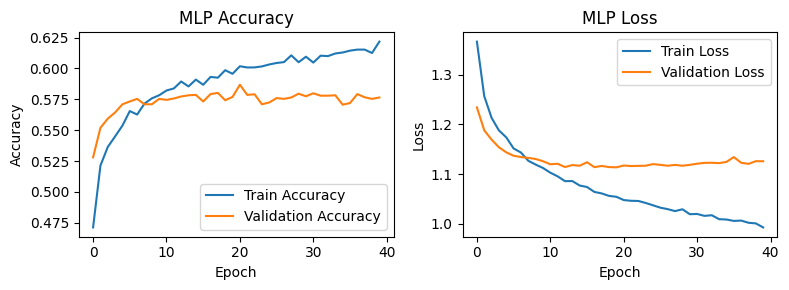

In [117]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## 1D CNN

In [80]:
# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(input_shape, 1)),
    MaxPooling1D(2),
    Conv1D(64, 4, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the 1D CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Reshape data for 1D CNN
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train the 1D CNN model
start_time = time.time()

cnn_history = cnn_model.fit(X_train_scaled_cnn, y_train,
                            batch_size=32,
                            epochs=50,
                            verbose=1,
                            validation_data=(X_test_scaled_cnn, y_test))

end_time = time.time()

# Evaluate the 1D CNN model
cnn_score = cnn_model.evaluate(X_test_scaled_cnn, y_test, verbose=0)
print('1D CNN Test loss:', cnn_score[0])
print('1D CNN Test accuracy:', cnn_score[1])
print("Running time for 1D CNN:", end_time - start_time, "seconds")

Epoch 1/50
774/774 [==============================] - 2s 2ms/step - loss: 1.4856 - accuracy: 0.4013 - val_loss: 1.3068 - val_accuracy: 0.5128
Epoch 2/50
774/774 [==============================] - 2s 2ms/step - loss: 1.3665 - accuracy: 0.4686 - val_loss: 1.2770 - val_accuracy: 0.5120
Epoch 3/50
774/774 [==============================] - 2s 2ms/step - loss: 1.3376 - accuracy: 0.4819 - val_loss: 1.2426 - val_accuracy: 0.5312
Epoch 4/50
774/774 [==============================] - 2s 2ms/step - loss: 1.3235 - accuracy: 0.4928 - val_loss: 1.2455 - val_accuracy: 0.5300
Epoch 5/50
774/774 [==============================] - 2s 2ms/step - loss: 1.3097 - accuracy: 0.4937 - val_loss: 1.2301 - val_accuracy: 0.5381
Epoch 6/50
774/774 [==============================] - 2s 2ms/step - loss: 1.2967 - accuracy: 0.5015 - val_loss: 1.2216 - val_accuracy: 0.5367
Epoch 7/50
774/774 [==============================] - 2s 2ms/step - loss: 1.2917 - accuracy: 0.4999 - val_loss: 1.2167 - val_accuracy: 0.5441
Epoch 

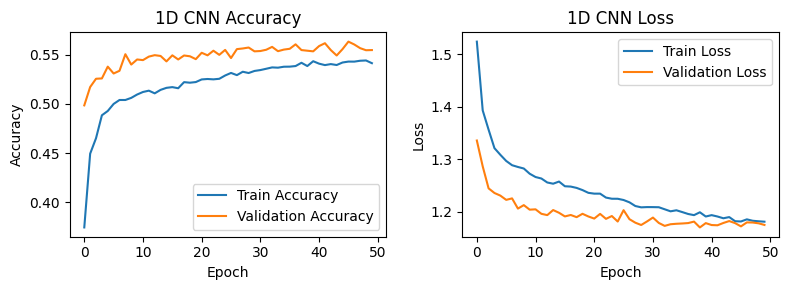

In [116]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1D CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2) 
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('1D CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Ensembling

In [114]:
# Weighted average of predictions
weight_mlp = 0.7
weight_cnn = 0.3

stacked_X_train = weight_mlp * mlp_model.predict(X_train_scaled) + weight_cnn * cnn_model.predict(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
stacked_X_test = weight_mlp * mlp_model.predict(X_test_scaled) + weight_cnn * cnn_model.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the stacked model
stacked_model = Sequential([
    Dense(64, activation='relu', input_shape=(stacked_X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the stacked model
stacked_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the stacked model
start_time = time.time()

stacked_history = stacked_model.fit(stacked_X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(stacked_X_test, y_test))

end_time = time.time()

# Evaluate the stacked model
stacked_score = stacked_model.evaluate(stacked_X_test, y_test, verbose=0)
print('Stacked Model Test loss:', stacked_score[0])
print('Stacked Model Test accuracy:', stacked_score[1])
print("Running time for Stacked Model:", end_time - start_time, "seconds")


194/194 [==============================] - 0s 729us/step
Epoch 1/50
774/774 [==============================] - 1s 759us/step - loss: 1.2034 - accuracy: 0.5779 - val_loss: 0.9412 - val_accuracy: 0.6622
Epoch 2/50
774/774 [==============================] - 1s 672us/step - loss: 1.0572 - accuracy: 0.6284 - val_loss: 0.9327 - val_accuracy: 0.6607
Epoch 3/50
774/774 [==============================] - 1s 663us/step - loss: 1.0459 - accuracy: 0.6340 - val_loss: 0.9353 - val_accuracy: 0.6624
Epoch 4/50
774/774 [==============================] - 1s 654us/step - loss: 1.0390 - accuracy: 0.6358 - val_loss: 0.9235 - val_accuracy: 0.6620
Epoch 5/50
774/774 [==============================] - 1s 660us/step - loss: 1.0323 - accuracy: 0.6355 - val_loss: 0.9243 - val_accuracy: 0.6601
Epoch 6/50
774/774 [==============================] - 1s 659us/step - loss: 1.0257 - accuracy: 0.6355 - val_loss: 0.9198 - val_accuracy: 0.6591
Epoch 7/50
774/774 [==============================] - 1s 653us/step - loss: 1.0

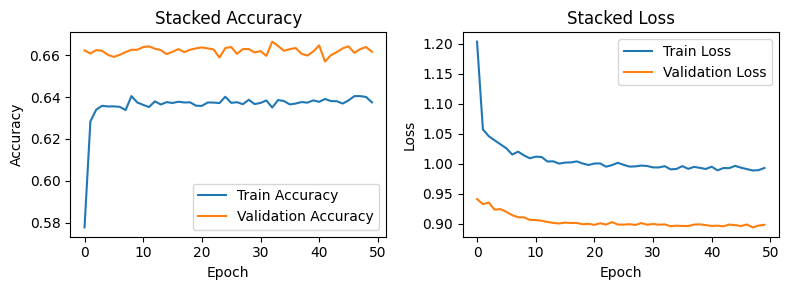

In [118]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(stacked_history.history['accuracy'], label='Train Accuracy')
plt.plot(stacked_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Stacked Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2) 
plt.plot(stacked_history.history['loss'], label='Train Loss')
plt.plot(stacked_history.history['val_loss'], label='Validation Loss')
plt.title('Stacked Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## CV for neural network models

In [107]:
X_full = np.concatenate((X_train_scaled, X_test_scaled))
y_full = np.concatenate((y_train, y_test))

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=106)

cv_scores = []

for train_index, test_index in kf.split(X_full):
    X_train_kf, X_test_kf = X_full[train_index], X_full[test_index]
    y_train_kf, y_test_kf = y_full[train_index], y_full[test_index]

    mlp_model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    mlp_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    history = mlp_model.fit(X_train_kf, y_train_kf,
                            batch_size=32,
                            epochs=40,
                            verbose=0,
                            validation_data=(X_test_kf, y_test_kf))

    score = mlp_model.evaluate(X_test_kf, y_test_kf, verbose=0)
    cv_scores.append(score[1])  

for i, score in enumerate(cv_scores):
    print(f'Fold {i+1} Accuracy: {score}')

print(f'Mean CV Accuracy: {np.mean(cv_scores)}')

Fold 1 Accuracy: 0.5722132325172424
Fold 2 Accuracy: 0.5840064883232117
Fold 3 Accuracy: 0.5739215016365051
Fold 4 Accuracy: 0.5747293829917908
Fold 5 Accuracy: 0.5765067338943481
Mean CV Accuracy: 0.5762754678726196


In [108]:
X_full_cnn = X_full.reshape(X_full.shape[0], X_full.shape[1], 1)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=106)

cv_scores = []

for train_index, test_index in kf.split(X_full_cnn):
    X_train_kf, X_test_kf = X_full_cnn[train_index], X_full_cnn[test_index]
    y_train_kf, y_test_kf = y_full[train_index], y_full[test_index]

    cnn_model = Sequential([
        Conv1D(32, 2, activation='relu', input_shape=(input_shape, 1)),
        MaxPooling1D(2),
        Conv1D(64, 4, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


    cnn_history = cnn_model.fit(X_train_kf, y_train_kf,
                                batch_size=32,
                                epochs=50,
                                verbose=0,
                                validation_data=(X_test_kf, y_test_kf))

    cnn_score = cnn_model.evaluate(X_test_kf, y_test_kf, verbose=0)
    cv_scores.append(cnn_score[1]) 

for i, score in enumerate(cv_scores):
    print(f'Fold {i+1} Accuracy: {score:.4f}')

print(f'Mean CV Accuracy: {np.mean(cv_scores):.4f}')

Fold 1 Accuracy: 0.5515
Fold 2 Accuracy: 0.5540
Fold 3 Accuracy: 0.5494
Fold 4 Accuracy: 0.5540
Fold 5 Accuracy: 0.5545
Mean CV Accuracy: 0.5527


In [109]:
weight_mlp = 0.7
weight_cnn = 0.3

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=106)

cv_scores = []

for train_index, test_index in kf.split(X_full):
    X_train_kf, X_test_kf = X_full[train_index], X_full[test_index]
    y_train_kf, y_test_kf = y_full[train_index], y_full[test_index]

    X_train_kf_cnn = X_train_kf.reshape(X_train_kf.shape[0], X_train_kf.shape[1], 1)
    X_test_kf_cnn = X_test_kf.reshape(X_test_kf.shape[0], X_test_kf.shape[1], 1)

    stacked_X_train_kf = weight_mlp * mlp_model.predict(X_train_kf) + weight_cnn * cnn_model.predict(X_train_kf_cnn)
    stacked_X_test_kf = weight_mlp * mlp_model.predict(X_test_kf) + weight_cnn * cnn_model.predict(X_test_kf_cnn)

    stacked_model = Sequential([
        Dense(64, activation='relu', input_shape=(stacked_X_train_kf.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    stacked_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    stacked_history = stacked_model.fit(stacked_X_train_kf, y_train_kf, epochs=50, batch_size=32, verbose=0, validation_data=(stacked_X_test_kf, y_test_kf))

    stacked_score = stacked_model.evaluate(stacked_X_test_kf, y_test_kf, verbose=0)
    cv_scores.append(stacked_score[1]) 

for i, score in enumerate(cv_scores):
    print(f'Fold {i+1} Accuracy: {score:.4f}')

print(f'Mean CV Accuracy: {np.mean(cv_scores):.4f}')

194/194 [==============================] - 0s 873us/step
Fold 1 Accuracy: 0.6716
Fold 2 Accuracy: 0.6687
Fold 3 Accuracy: 0.6681
Fold 4 Accuracy: 0.6651
Fold 5 Accuracy: 0.5807
Mean CV Accuracy: 0.6508
